In [30]:
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",na_values=['NA','?'])

display(df[0:5])

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
from scipy.stats import zscore

# Prepare data - apply z-score to ALL x columns
# Only do this if you have no categoricals (and are sure you want to use z-score across the board)
x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
    df[col] = zscore(df[col])

# Convert to numpy - Regression
x = df[x_columns].values
y = df['diagnosis'].map({'M':1,"B":0}).values # Binary classification, M is 1 and B is 0

In [32]:
print(x.shape)

(569, 30)


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--',color='navy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [34]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', 
                        min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)


model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 426 samples, validate on 143 samples
Epoch 1/1000
426/426 - 0s - loss: 0.6870 - accuracy: 0.8005 - val_loss: 0.6704 - val_accuracy: 0.9231
Epoch 2/1000
426/426 - 0s - loss: 0.6345 - accuracy: 0.9319 - val_loss: 0.5534 - val_accuracy: 0.9580
Epoch 3/1000
426/426 - 0s - loss: 0.4422 - accuracy: 0.9413 - val_loss: 0.2595 - val_accuracy: 0.9510
Epoch 4/1000
426/426 - 0s - loss: 0.1958 - accuracy: 0.9390 - val_loss: 0.0973 - val_accuracy: 0.9580
Epoch 5/1000
426/426 - 0s - loss: 0.1113 - accuracy: 0.9624 - val_loss: 0.0596 - val_accuracy: 0.9790
Epoch 6/1000
426/426 - 0s - loss: 0.0832 - accuracy: 0.9812 - val_loss: 0.0536 - val_accuracy: 0.9790
Epoch 7/1000
426/426 - 0s - loss: 0.0724 - accuracy: 0.9789 - val_loss: 0.0513 - val_accuracy: 0.9930
Epoch 8/1000
426/426 - 0s - loss: 0.0661 - accuracy: 0.9812 - val_loss: 0.0491 - val_accuracy: 0.9930
Epoch 9/1000
426/426 - 0s - loss: 0.0604 - accuracy: 0.9836 - val_loss: 0.0537 - val_accuracy: 0.9720
Epoch 10/1000
426/426 - 0s - loss: 0

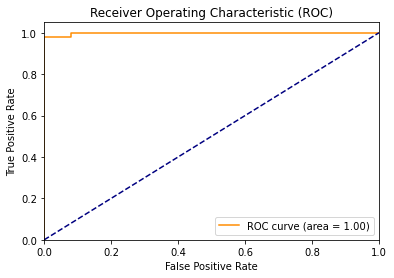

In [40]:
pred = model.predict(x_test)
plot_roc(pred,y_test)

In [48]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(pred.round(),y_test))

[[89  1]
 [ 0 53]]
